Nếu cùng sấp hoặc cùng ngửa với người 1 thì người 2 mất 1. Ngược lại thì dược 1

- $E(S_2)=-p_1+1-p_1=-2p_1+1=E$
- $E(N_2)=p_1+p_1-1=2p_1-1=-E$
- $V(S_2)=(-1-E)^2p_1+(1-E)^2(1-p_1)\\ =(1+2E+E^2)p_1+(1-2E+E^2)(1-p_1)\\ =E^2+(4p_1-2)E+1$
- $V(N_2)=(1+E)^2p_1+(-1+E)^2(1-p_1)\\ =(1+2E+E^2)p_1+(1-2E+E^2)(1-p_1)\\ =E^2+(4p_1-2)E+1$
- $Cov(S_2,N_2)=-(1+E)^2p_1-(-1+E)^2(1-p_1)\\ =-[E^2+(4p_1-2)E+1]$
- $V(p_2S_2+(1-p_2)N_2)=(E^2+(4p_1-2)E+1)(p_2^2+(1-p_2)^2-2p_2(1-p_2))$
- $E(p_2S_2+(1-p_2)N_2)=(2p_1-1)(1-2p_2)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
class Infor():
    def __init__(self, p1, p2):
        self.p1=p1
        self.p2=p2
        
    def ER(self):
        EN = (2*self.p1-1)*(1-2*self.p2)
        return EN
    def Var(self):
        E=-2*self.p1+1
        V = (E**2+(4*self.p1-2)*E+1)*(self.p2**2+(1-self.p2)**2-2*self.p2*(1-self.p2))
        return V

In [3]:
class ve_do_thi():
    nums = 10000
    p10 = np.random.rand(nums)
    p20 = np.random.rand(nums)
    def __init__(self, p1):
        self.p1 = p1
        self.m =[]
    def chien_luoc(self):
        b = Infor(self.p1,ve_do_thi.p20)
        m= (b.ER()-b.Var()).tolist()
        p2 =ve_do_thi.p20[m.index(np.max(m))]
        e = Infor(self.p1, p2)           
        print(f"Người 1: {self.p1}")
        print(f"Người 2: {p2}")

    def relation(self):
        fig = plt.figure()
        a= Infor(ve_do_thi.p10,ve_do_thi.p20)
        plt.scatter(a.Var(), a.ER())    
        plt.xlabel("var(p2S2+(1-p2)S2)")
        plt.ylabel("E(p2S2+(1-p2)S2)")        
    
    def minh_hoa(self):
        fig = plt.figure()
        b = Infor(self.p1,ve_do_thi.p20)
        c = Infor(self.p1,0)
        d = Infor(self.p1,1)    
        self.m= (b.ER()-b.Var()).tolist()
    

        self.relation()
        plt.scatter(b.Var(), b.ER(), color="pink")
        plt.scatter(c.Var(), c.ER(), color="yellow")
        plt.scatter(d.Var(), d.ER(), color="red")

        
    
    def maxEV(self):
        p2 =ve_do_thi.p20[self.m.index(np.max(self.m))]
        e = Infor(self.p1, p2)           
        plt.scatter(e.Var(), e.ER(), color="green")
    
    

In [4]:
a= ve_do_thi(0.8)

Mối quan hệ của E và V trên đồ thị

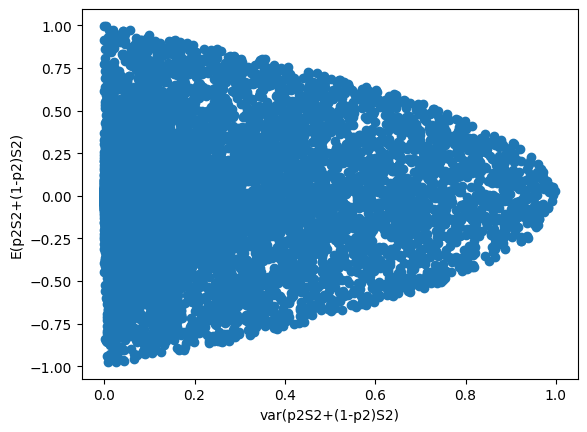

In [5]:
a.relation()

Nếu $p_1=0.8$ thì ta có điểm vàng ($p_2=0$) là điểm cho kỳ vọng cao nhất

<Figure size 640x480 with 0 Axes>

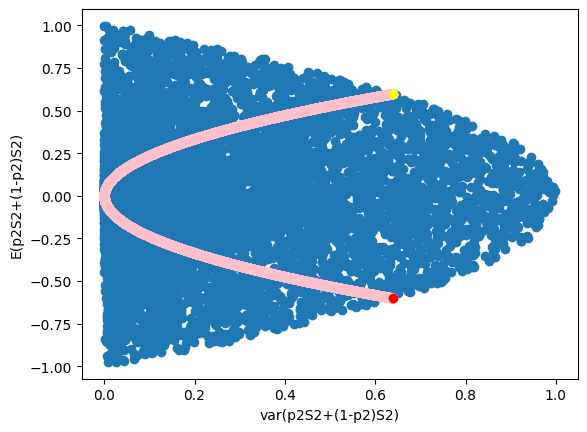

In [6]:
a.minh_hoa()

- Giả sử $p_1$ bằng 0.8, khi đó mối quan hệ giữa là đường màu hồng, điểm màu đỏ thể hiện khi $p_2=1,$ điểm màu vàng thể hiện khi $p_2=0$. Điểm màu vàng cho thấy khi $p_1=0.8$ thì tại đó ta có kỳ vọng lớn nhất, điểm màu đỏ cho biết kỳ vọng thấp nhất

- Dễ thấy từ đồ thị, điểm màu vàng cho kỳ vọng cao nhất nhưng var cũng cao nhất

Ngoài việc lấy kỳ vọng cao nhất, ta có thể lấy vài chỉ tiêu khác vd E-V. Điểm màu xanh lá sẽ là điểm cho E-V cao nhất. 

<Figure size 640x480 with 0 Axes>

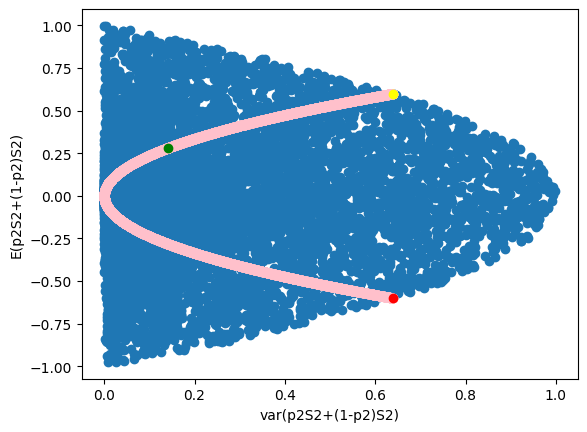

In [7]:
a.minh_hoa()
a.maxEV()

In [8]:
a.chien_luoc()

Người 1: 0.8
Người 2: 0.265642165369417


Khi $p_1=0$ thì ta có đồ thị sau

<Figure size 640x480 with 0 Axes>

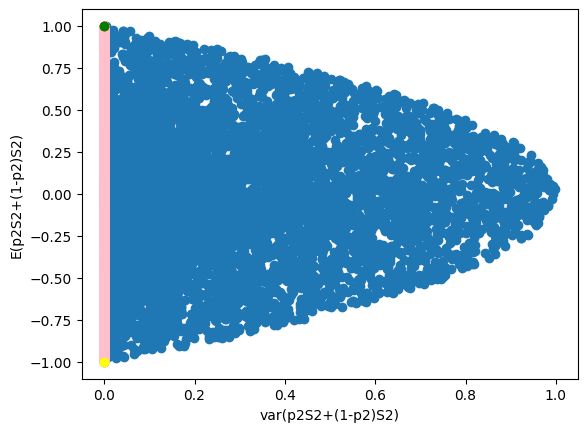

In [9]:
b = ve_do_thi(0)
b.minh_hoa()
b.maxEV()

In [10]:
b.chien_luoc()

Người 1: 0
Người 2: 0.99982366905282


# Kiểm tra chiến lược

In [1]:
import sys
path = "../Back_test"
sys.path.append(path)

from back_test import Kiem_dinh

In [4]:
payoff1 = [[1,-1],[-1,1]]
payoff2 = [[-1,1],[1,-1]]
a = [0.8,0.2]

Khi người 2 chọn chiến lược $p_2=0.266$ khi $p_1=0.8$

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: xlabel='Lợi ích thu được được', ylabel='Frequency'>)

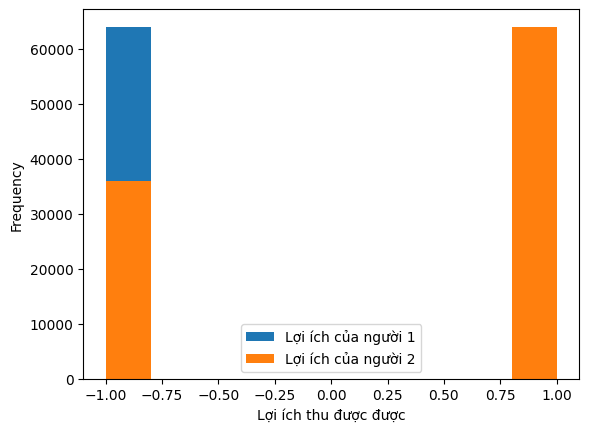

In [5]:
b = [0.266,1-0.266]
c=Kiem_dinh(so_chien_luoc1=2, so_chien_luoc2=2, payoff1=payoff1, payoff2=payoff2, mix_stra1=a, mix_stra2=b)
c.mat_do_loi_ich()

Khi người 2 chọn chiến lược $p_2=0$ khi $p_1=0.8$

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: xlabel='Lợi ích thu được được', ylabel='Frequency'>)

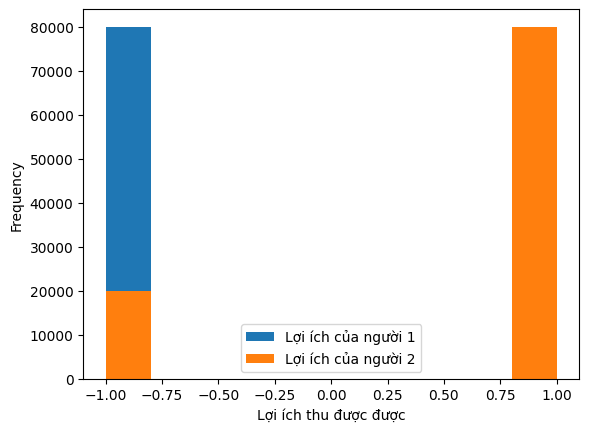

In [6]:
payoff1 = [[1,-1],[-1,1]]
payoff2 = [[-1,1],[1,-1]]
a = [0.8,0.2]
b = [0,1]
c=Kiem_dinh(so_chien_luoc1=2, so_chien_luoc2=2, payoff1=payoff1, payoff2=payoff2, mix_stra1=a, mix_stra2=b)
c.mat_do_loi_ich()

Vậy Lợi ích thu được khi $p_2=0$ là lớn nhất và cũng là chiến lược tối ưu

# Tìm chiến lược bằng Q learning

In [1]:
import sys
path = "../Q learning"
sys.path.append(path)

from find_strategy import find_best_strategy

In [33]:
payoff1 = [[1,-1],[-1,1]]

In [34]:
a= find_best_strategy(payoff=payoff1,num_strategy=2,prob_rival=[1/3,2/3])
a.run()
a.show_statistics()

Iteration 0, strategy 1 with Q value 1.0
Iteration 1, strategy 1 with Q value 1.0
Iteration 2, strategy 1 with Q value 1.0
Iteration 3, strategy 1 with Q value 1.0
Iteration 4, strategy 0 with Q value -1.0
Iteration 5, strategy 1 with Q value 1.0
Iteration 6, strategy 1 with Q value 0.6666666666666667
Iteration 7, strategy 1 with Q value 0.42857142857142866
Iteration 8, strategy 1 with Q value 0.2500000000000001
Iteration 9, strategy 1 with Q value 0.11111111111111122
Iteration 10, strategy 1 with Q value 0.20000000000000012
Iteration 11, strategy 1 with Q value 0.09090909090909101
Iteration 12, strategy 1 with Q value 0.16666666666666674
Iteration 13, strategy 1 with Q value 0.23076923076923084
Iteration 14, strategy 1 with Q value 0.28571428571428575
Iteration 15, strategy 1 with Q value 0.20000000000000004
Iteration 16, strategy 1 with Q value 0.25000000000000006
Iteration 17, strategy 1 with Q value 0.2941176470588236
Iteration 18, strategy 1 with Q value 0.2222222222222223
Iterati